### Packages
Load the required packages & libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


### Load the Dataset
- Load and Display the dataset
- Drop Unnecessary column

In [54]:
df = pd.read_csv("data/laptop_pricing_dataset.csv")  #loading the dataset

df.head() #Print some part of the dataset
df.info() #Display basic info

df.drop(columns=["Unnamed: 0"], inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'data/laptop_pricing_dataset.csv'

### Data Preprocessing
- Define Features (X) and Target Variable (Y) then Identify Categorical and Numerical columns
- Create a Data Preprocessing Pipeline
- Split data into training and testing sets then apply Preprocessing to the data

In [41]:
# Defining X and Y
X = df.drop(columns=["Price"])
Y = df["Price"]

#Selecting categorical & numerical columns
categorical_cols = ["Manufacturer", "Screen"]
numerical_cols = ["Screen_Size_cm", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg"]

# Data Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),  # Fill missing values with column mean
        ("scaler", StandardScaler())  # Standardize numerical features (mean = 0, std = 1)
    ]), numerical_cols),
    
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)  # Convert categorical to numeric
])

# Split data into train & test then apply preprocessing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

### Parameters & Train-test loss
- Initialize Model Parameters & set Hyperparameters
- Track training and testing loss

In [42]:
# Initialize model parameters
m, n = X_train_transformed.shape
theta = np.zeros(n)  # Initialize weights to zero
bias = 0  # Bias term

# Hyperparameters
learning_rate = 0.01
iterations = 100

# Store loss values
train_losses, test_losses = [], []


### Gradient Descent Implementation

- Compute Predictions
- Calculate Mean Squared Error (MSE)
- Train the model & update values

In [43]:
# Gradient Descent Implementation
for _ in range(iterations):
    # Compute Predictions
    Y_train_pred = X_train_transformed.dot(theta) + bias
    Y_test_pred = X_test_transformed.dot(theta) + bias

    # Compute Cost (MSE)
    train_loss = np.mean((Y_train_pred - Y_train) ** 2)
    test_loss = np.mean((Y_test_pred - Y_test) ** 2)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    # Compute Gradients
    d_theta = (2/m) * X_train_transformed.T.dot(Y_train_pred - Y_train)
    d_bias = (2/m) * np.sum(Y_train_pred - Y_train)

    # Update Parameters
    theta -= learning_rate * d_theta
    bias -= learning_rate * d_bias

### Loss Curve & R² score
- Plot loss curve 
- Find final model performance using R² score

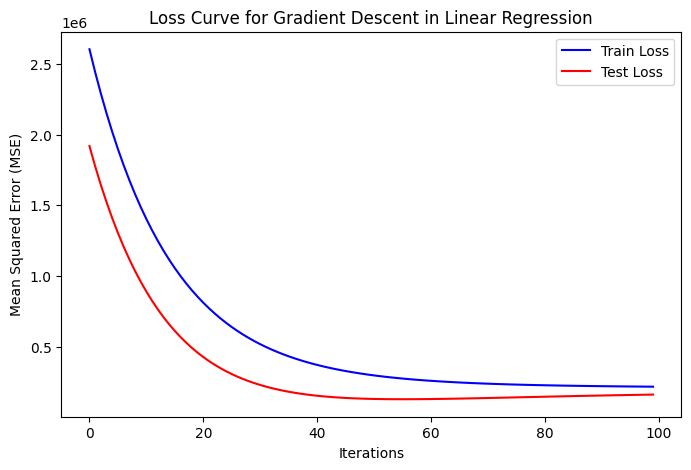

0.2334525409942385

In [44]:
# Plot Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label="Train Loss", color="blue")
plt.plot(test_losses, label="Test Loss", color="red")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Curve for Gradient Descent in Linear Regression")
plt.legend()
plt.show()

# Evaluate final model performance using R² score
final_model = LinearRegression()
final_model.fit(X_train_transformed, Y_train)
r2_score = final_model.score(X_test_transformed, Y_test)
r2_score

### Decision Tree
 Use Decision Tree model
- Train model and make predictions
- Compute RMSE

In [46]:
# Initialize models
dt_model = DecisionTreeRegressor(random_state=42)

# Train models
dt_model.fit(X_train_transformed, Y_train)

# Predict on test data
Y_pred_dt = dt_model.predict(X_test_transformed)

# Compute RMSE
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_dt))
print(f"Decision Tree RMSE: {rmse_dt}")

Decision Tree RMSE: 439.52335688789054


### Random Forest
 Use Random Forest model
- Train model and make predictions
- Compute RMSE

In [48]:
# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
rf_model.fit(X_train_transformed, Y_train)

# Predict on test data
Y_pred_rf = rf_model.predict(X_test_transformed)

# Compute RMSE
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

Random Forest RMSE: 401.39677493127897


### Linear Regression
 Use Linear Regression
- Train model and make predictions
- Compute RMSE

In [49]:
# Initialize models
lr_model = LinearRegression()

# Train models
lr_model.fit(X_train_transformed, Y_train)

# Predict on test data
Y_pred_lr = lr_model.predict(X_test_transformed)

# Compute RMSE
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))
print(f"Random Forest RMSE: {rmse_lr}")

Random Forest RMSE: 420.3113716682984


### Comparison and Selection of best model

In [50]:
best_model = min(
    [("Linear Regression", rmse_lr), 
     ("Decision Tree", rmse_dt), 
     ("Random Forest", rmse_rf)],
    key=lambda x: x[1]  # Sort by lowest RMSE
)[0]

print(f"Best performing model: {best_model}")

Best performing model: Random Forest
